In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pickle
import emullver
import plotting
import _globals
from xspec import *
import torch
import torch.nn as nn
import torch.optim as optim
from xspec_comparison import *
from emullver import *
from error import *
import random
from emullver import *

import tensorflow as tf
import matplotlib.colors as colors
from models import *

Xset.chatter = 0
Xset.logChatter = 0

In [15]:
import tensorflow as tf

# Set the number of threads for intra-op and inter-op parallelism
tf.config.threading.set_intra_op_parallelism_threads(8)
tf.config.threading.set_inter_op_parallelism_threads(8)

RuntimeError: Intra op parallelism cannot be modified after initialization.

In [2]:
train_X, train_Y, valid_X, valid_Y, test_X, test_Y = get_data()

In [3]:
model1 = get_model1('model_weights/model10.pth')
model2 = get_model2('model_weights/model11.pth')

In [7]:
model1=EncoderDecoderModel('model_weights/encoderdecoder.pth')

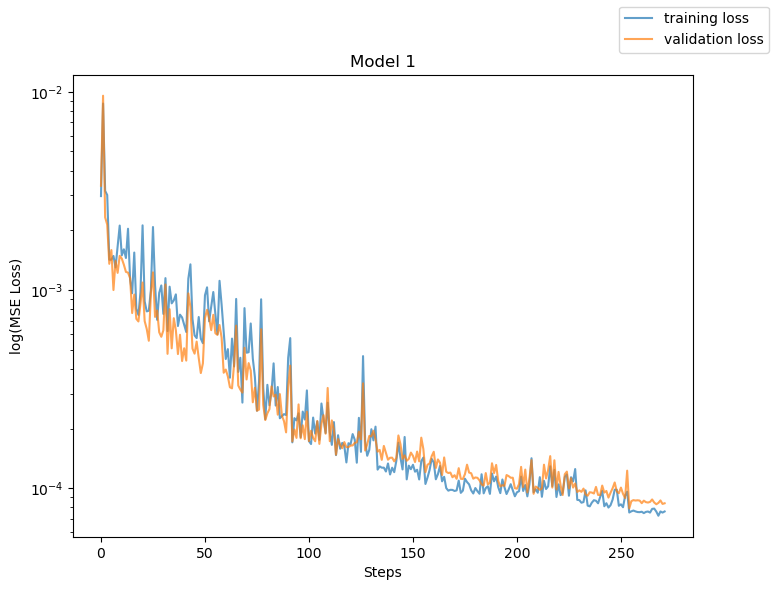

In [8]:
model_plot_loss('model_loss/encoderdecoder_valid_loss.npy', 'model_loss/encoderdecoder_train_loss.npy', 'Model 1')

In [9]:
Y = train_Y.clone()
Y = Y / 2.720513452838532

In [10]:
tuples = model_get_tuples(model1, Y, test_Y)

ValueError: operands could not be broadcast together with shapes (4999,) (5,) 

In [24]:
pred=model1(Y[4688])

In [ ]:
print(Y)

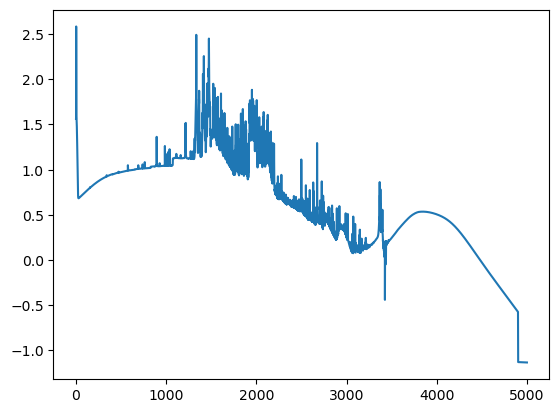

In [22]:
plt.plot(range(4999),Y[4688])
plt.show()

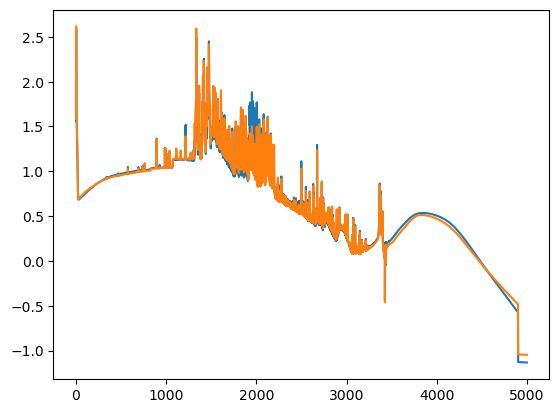

In [25]:
plt.plot(range(4999),Y[4688])
plt.plot(range(4999),pred.detach().numpy())
plt.show()

In [11]:
tuples = []
for i, (x, y) in enumerate(zip(Y, train_Y)):
    pred = model1(x)
    pred = 2.720513452838532 * pred
    error = torch.mean(torch.square(pred - y)).item()
#         x = params_to_physical_units(x)
    tuples.append(np.array([error, i]))

tuples = np.array(tuples)
# return tuples

In [15]:
# print(tuples[0])

[0.00029133 0.        ]


In [16]:
tuples = get_sorted_tuples(tuples)

In [21]:
print(tuples[0][1])

4688.0


In [20]:
print(tuples[-1])

[3.72647482e-05 2.14300000e+03]


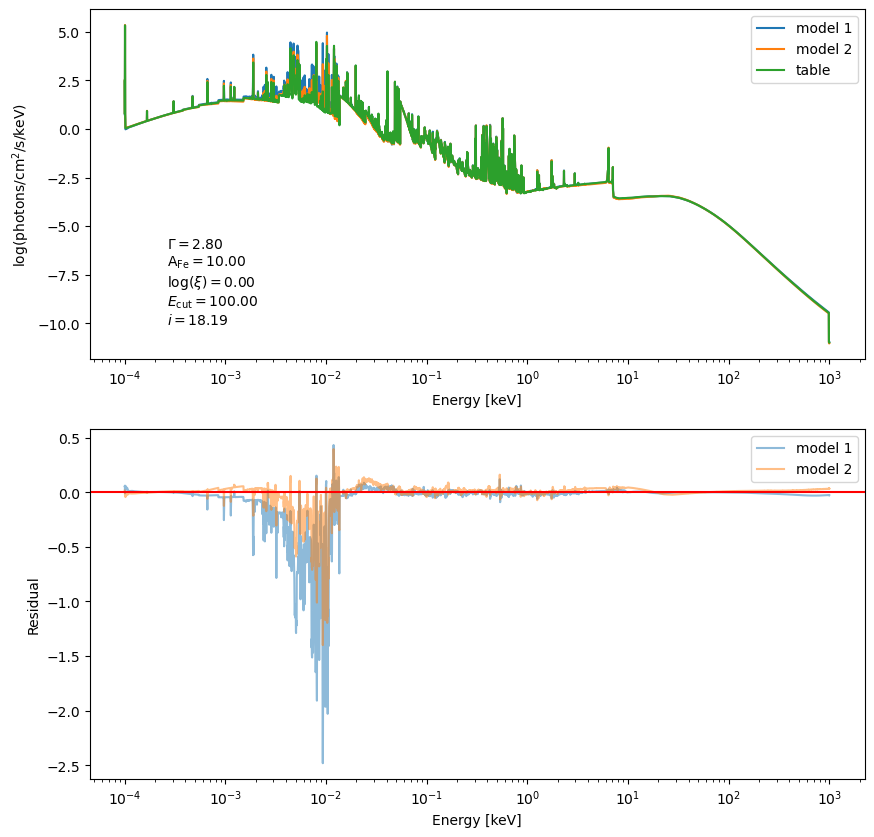

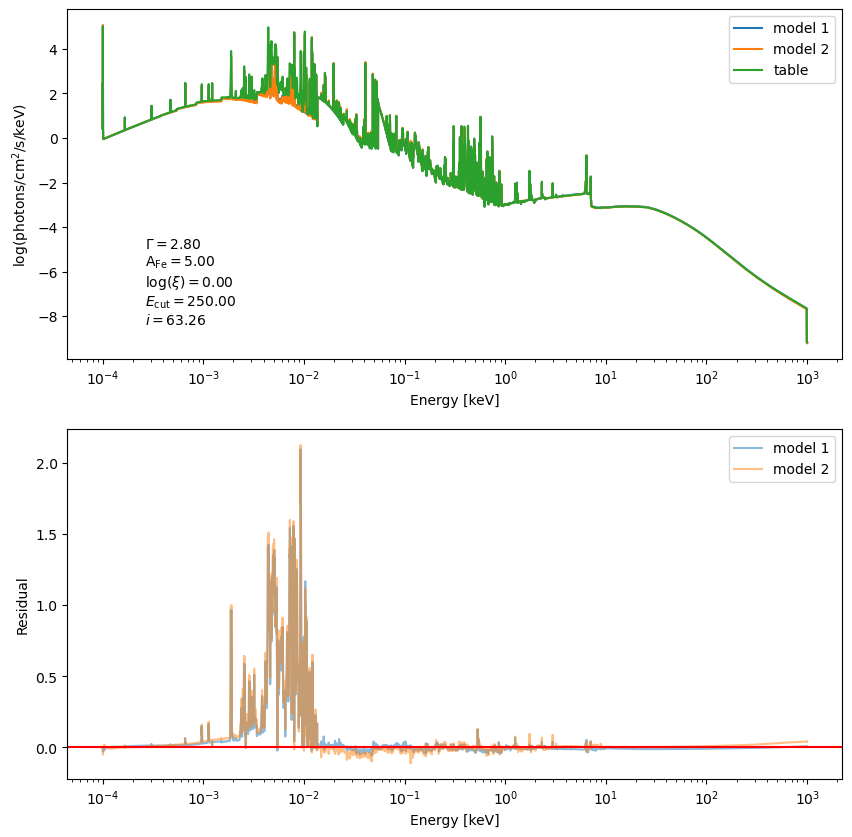

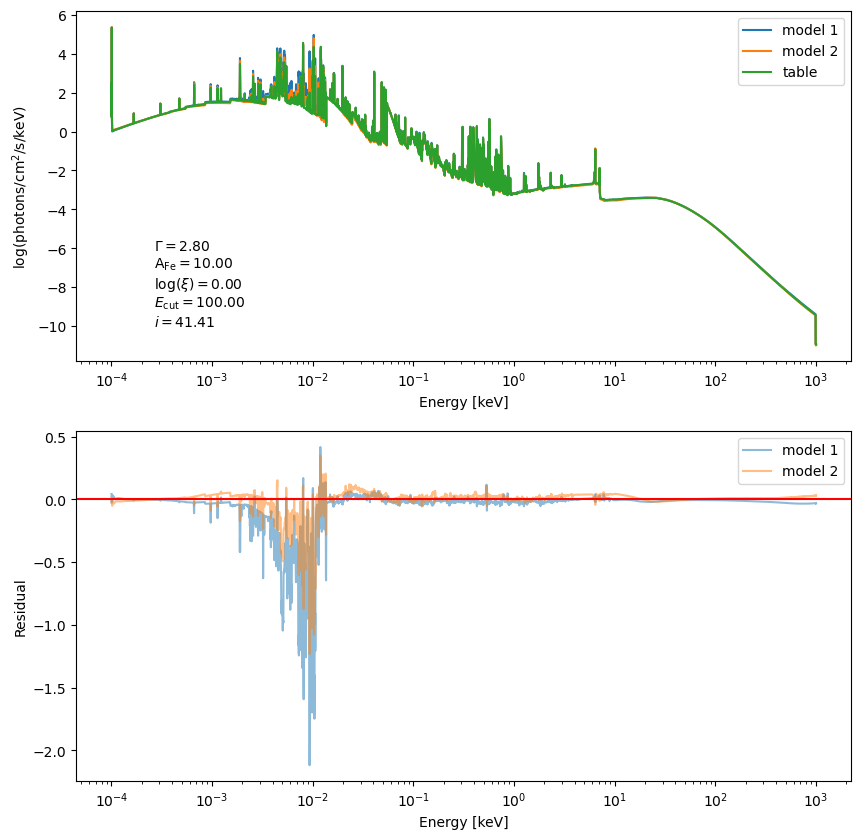

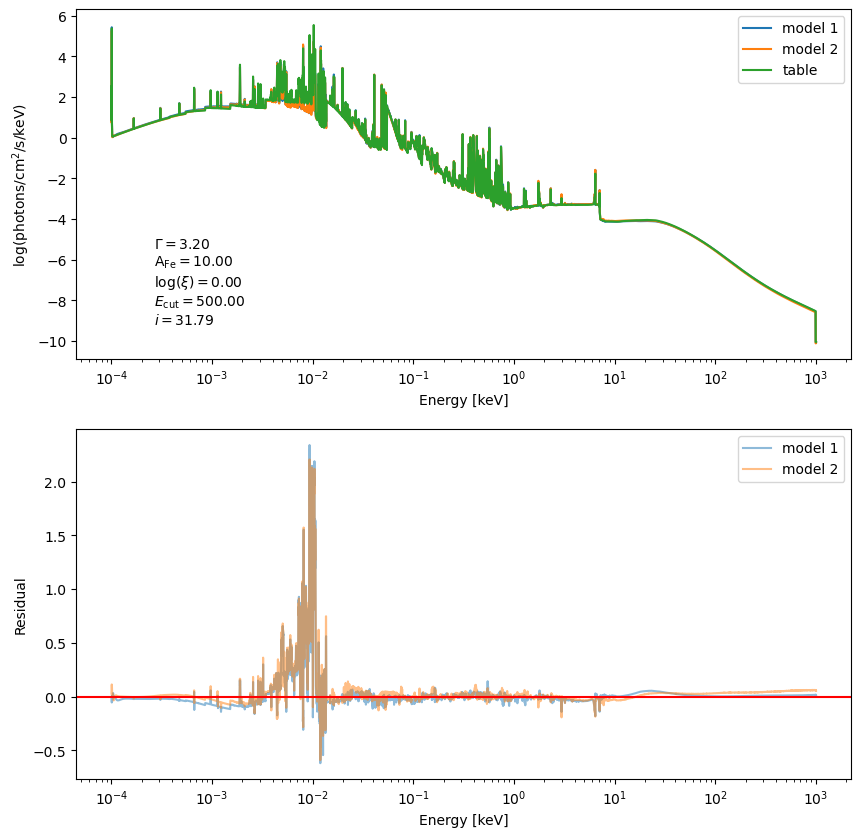

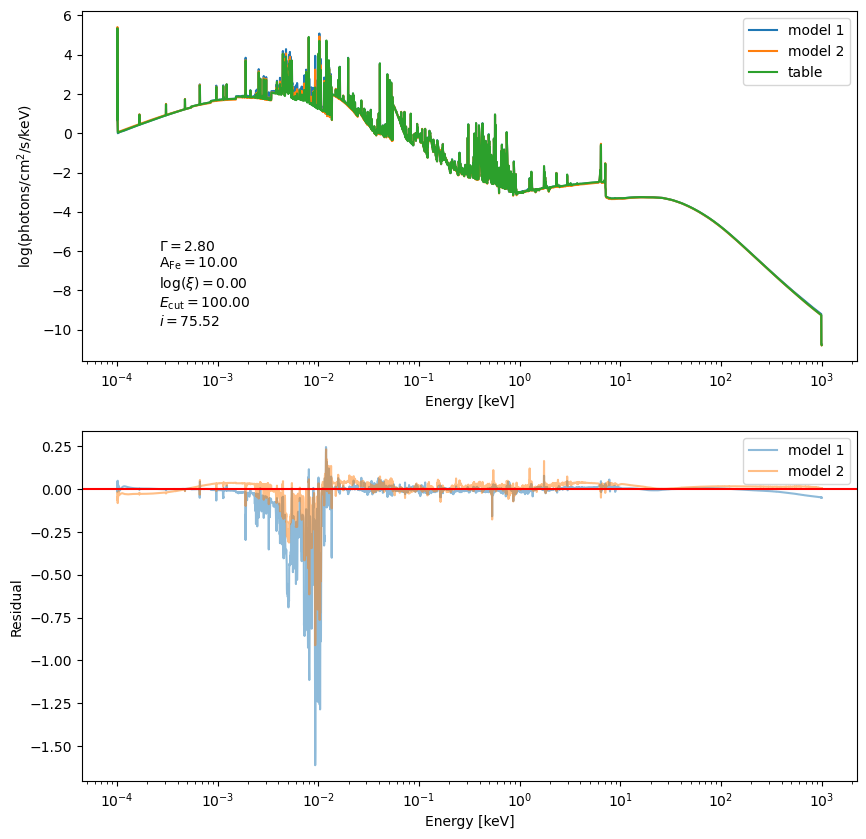

In [6]:
model_plots([model1, model2], tuples, test_Y, 5)

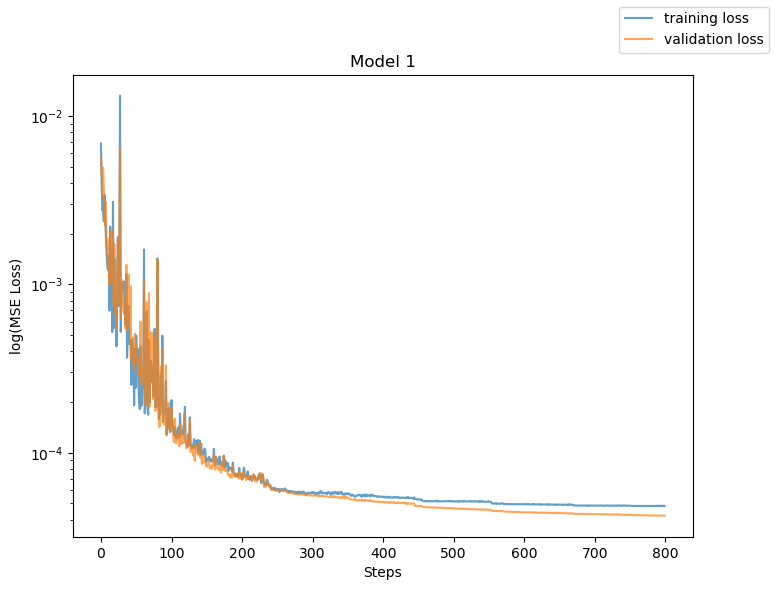

In [7]:
model_plot_loss('model_loss/model10_valid_loss.npy', 'model_loss/model10_train_loss.npy', 'Model 1')